In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import time
from tensorflow.keras.callbacks import TensorBoard
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
train_path = 'C:/Users/Arpit/Desktop/Project/Datasets/Custom/train'
valid_path = 'C:/Users/Arpit/Desktop/Project/Datasets/Custom/val'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(valid_path,
                                         target_size = (64, 64),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 3648 images belonging to 2 classes.
Found 1041 images belonging to 2 classes.


In [3]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
model_details=model.fit(x=training_set, validation_data=val_set, batch_size = 32, epochs = 30, verbose = 2,steps_per_epoch=len(training_set),validation_steps=len(val_set))

Epoch 1/30
114/114 - 282s - loss: 0.4837 - accuracy: 0.7930 - val_loss: 0.4965 - val_accuracy: 0.7983
Epoch 2/30
114/114 - 246s - loss: 0.4109 - accuracy: 0.8369 - val_loss: 0.3825 - val_accuracy: 0.8482
Epoch 3/30
114/114 - 235s - loss: 0.3808 - accuracy: 0.8459 - val_loss: 0.3529 - val_accuracy: 0.8540
Epoch 4/30
114/114 - 233s - loss: 0.3603 - accuracy: 0.8553 - val_loss: 0.3263 - val_accuracy: 0.8607
Epoch 5/30
114/114 - 280s - loss: 0.3354 - accuracy: 0.8591 - val_loss: 0.7328 - val_accuracy: 0.5591
Epoch 6/30
114/114 - 247s - loss: 0.3387 - accuracy: 0.8646 - val_loss: 0.3535 - val_accuracy: 0.8386
Epoch 7/30
114/114 - 247s - loss: 0.3112 - accuracy: 0.8734 - val_loss: 0.5122 - val_accuracy: 0.7243
Epoch 8/30
114/114 - 248s - loss: 0.3027 - accuracy: 0.8829 - val_loss: 0.3367 - val_accuracy: 0.8549
Epoch 9/30
114/114 - 232s - loss: 0.2736 - accuracy: 0.8906 - val_loss: 0.3725 - val_accuracy: 0.8425
Epoch 10/30
114/114 - 235s - loss: 0.2659 - accuracy: 0.8999 - val_loss: 0.3202 - 

In [8]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [9]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

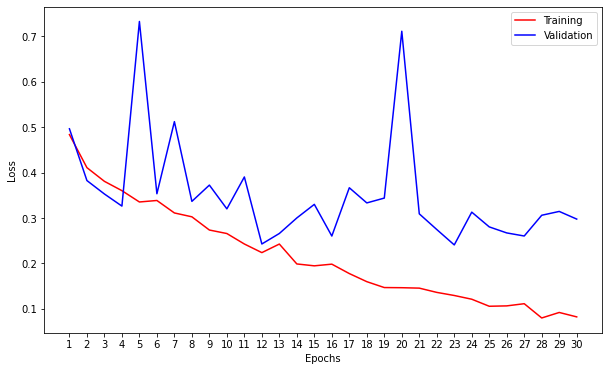

In [11]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

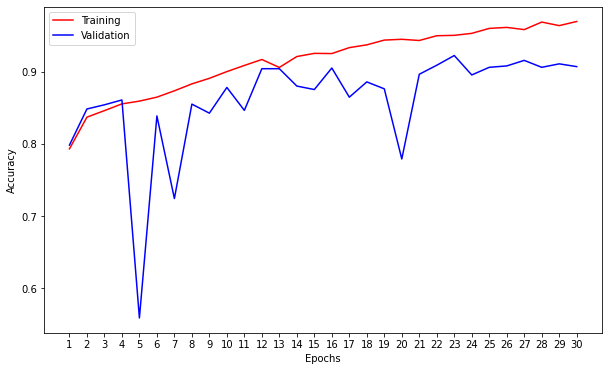

In [12]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [14]:
import numpy as np
from keras.preprocessing import image
img_path = 'C:/Users/Arpit/Desktop/Project/Datasets/Custom/test/non-garbage-queried-images/mouseimg.jpeg'
test_image = image.load_img(img_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0]>result[0][1]:
  print("Garbage")
else:
  print("Non-Garbage")

Non-Garbage
